<a href="https://colab.research.google.com/github/LucyMariel/Lucy/blob/master/DIVICFujiDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient descent is likened to going down a mountain or valley. You will learn the gradient descent method by creating a descent program from Mt. Fuji, as if it were an objective function that you want to minimize.
Access the elevation data and enter 1632 in the password field.
Please download mtfuji_data.csv from the access destination.

Execute the following code to load the downloaded mtfuji_data.csv.

In [2]:
import numpy as np

csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [3]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


In order from the left, it is "the number of the point", "*latitude*", "*longitude*", "elevation", and "distance from point 0". The unit of altitude and distance is meters. It is the data of 300 points.

Link: numpy.set_printoptions — NumPy v1.16 Manual

Link: numpy.loadtxt — NumPy v1.16 Manual

**[Problem 1] Data visualization**

Visualize elevation data using Matplotlib. If you set "the number of the point" on the horizontal axis and "elevation" on the vertical axis, you can draw a cross-sectional view of Mt. Fuji.

In [6]:
print(fuji.dtype.names)

None


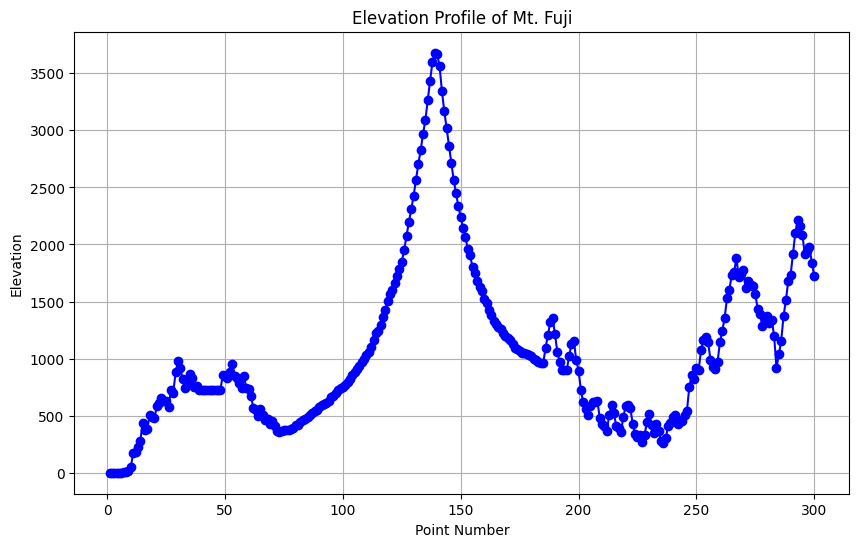

In [7]:
import matplotlib.pyplot as plt

csv_path = "mtfuji_data.csv"

# Load data using numpy
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Extract the elevation data
elevation = fuji[:, 3]  # Assuming elevation is in the fourth column (index 3)

# Create x-axis values (point numbers)
point_numbers = np.arange(len(elevation)) + 1  # Start from 1, not 0

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(point_numbers, elevation, marker='o', linestyle='-', color='b')
plt.title('Elevation Profile of Mt. Fuji')
plt.xlabel('Point Number')
plt.ylabel('Elevation')
plt.grid(True)
plt.show()

If you look at this cross section, you can easily see the low place, but this time I imagine a situation where only the slope of your feet is known in the dark.

**[Problem 2] Create a function to calculate the gradient at a certain point**

In "Two-dimensional array and gradient problem", the gradient at each point was calculated first. However, if you imagine Mt. Fuji in the dark, you can only know the slope of your current location.

Create a function to find the gradient by the relationship between "the number of the current point" and "the number of the next point you are now (number of the current point-1)".

The gradient was calculated by the following formula, but in this data, "elevation" corresponds to y and "the number of that point" corresponds to x.

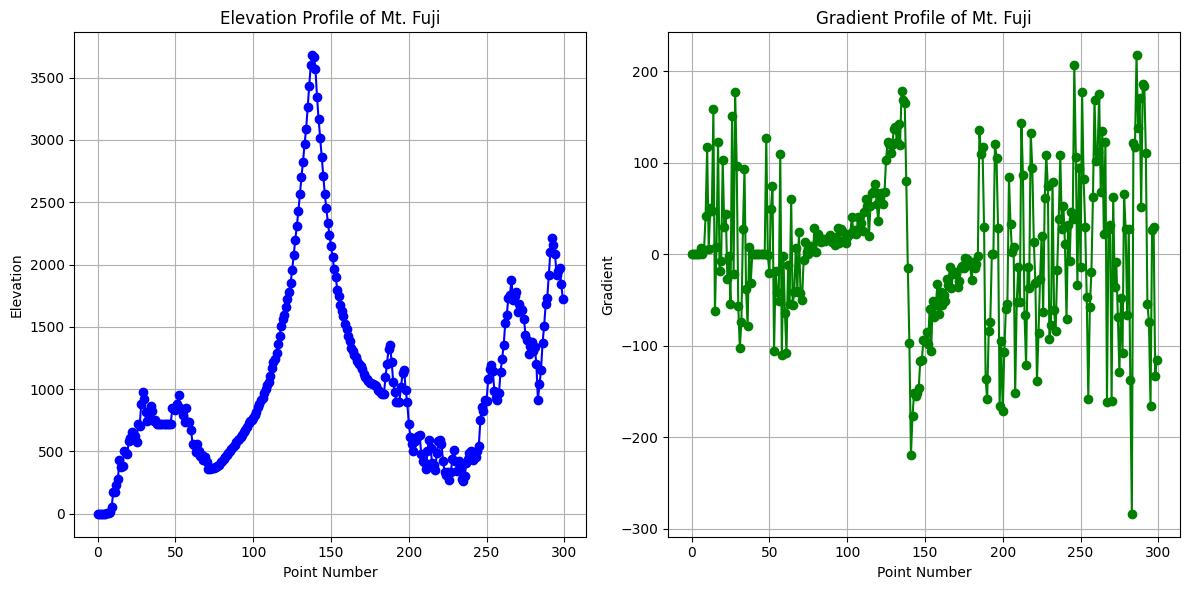

In [8]:
import matplotlib.pyplot as plt
# First, calculate gradients
def calculate_gradient(point_numbers, elevation):
    gradients = np.zeros_like(elevation)  # Initialize array for gradients

    for i in range(1, len(elevation)):
        dx = point_numbers[i] - point_numbers[i-1]
        dy = elevation[i] - elevation[i-1]
        gradient = dy / dx
        gradients[i] = gradient

    # Set the gradient for the first point to 0 (or any other desired value)
    gradients[0] = gradients[1]  # Setting the gradient for the first point as the same as the second

    return gradients

def plot_elevation_and_gradients(point_numbers, elevation, gradients):
    plt.figure(figsize=(12, 6))

    # Plot elevation
    plt.subplot(1, 2, 1)
    plt.plot(point_numbers, elevation, marker='o', linestyle='-', color='b')
    plt.title('Elevation Profile of Mt. Fuji')
    plt.xlabel('Point Number')
    plt.ylabel('Elevation')
    plt.grid(True)

    # Plot gradients
    plt.subplot(1, 2, 2)
    plt.plot(point_numbers, gradients, marker='o', linestyle='-', color='g')
    plt.title('Gradient Profile of Mt. Fuji')
    plt.xlabel('Point Number')
    plt.ylabel('Gradient')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Extract point numbers and elevation data
point_numbers = fuji[:, 0]
elevation = fuji[:, 3]

# Calculate gradients
gradients = calculate_gradient(point_numbers, elevation)

# Plot elevation and gradients
plot_elevation_and_gradients(point_numbers, elevation, gradients)

**[Problem 3] Create a function to calculate the destination point**
Create a function that calculates the next point to move to based on the information on the slope of the current point.

Expressed in a mathematical formula, "destination point = current point-$ \ alpha $ x current point gradient".

Use the return value of the function created in Problem 2 for the "gradient of the current point". $ \ Alpha $ is a hyperparameter that takes any value greater than 0. In the field of machine learning, it is called the learning rate. The way of descending changes depending on this value. Here, for example, set it to 0.2.

<< Implementation Precautions >>

If you calculate the above formula, a floating point number will appear at the destination point, but in order to obtain the gradient information this time, the point must be represented by an integer. Therefore, please perform conversion by rounding. In addition, it is necessary to process when the value becomes impossible. For example, if the destination point is negative, then no such data exists and the next gradient cannot be obtained.

Python tutorial errors and exceptions

<< What are hyperparameters >>

In a machine learning method, it is a value that cannot be optimized by the method itself. The settings should be done with caution, as the value will change the behavior of the technique and affect the success of the learning. The simplest thing is that humans think of it as Settings, but there are also methods for mechanically determining hyperparameters.

In [9]:
import numpy as np

def calculate_next_point(current_point, current_gradient, alpha):
    # Calculate the destination point
    destination_point = current_point - alpha * current_gradient

    # Round to the nearest integer
    destination_point = int(round(destination_point))

    # Check if the destination point is within valid range
    if destination_point < 0 or destination_point >= len(point_numbers):
        return None  # Return None if destination point is out of bounds

    return destination_point

# Example usage
alpha = 0.2  # Learning rate

# Example data (replace with your actual data loading and preparation)
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
point_numbers = fuji[:, 0]
elevation = fuji[:, 3]

# Assuming you have gradients calculated from previous steps
# Let's use the gradients computed earlier
gradients = calculate_gradient(point_numbers, elevation)

# Example: Calculate next point from a given current point
current_point = 100  # Example starting point
current_gradient = gradients[current_point]

next_point = calculate_next_point(current_point, current_gradient, alpha)
print(f"Current point: {current_point}, Next point: {next_point}")

Current point: 100, Next point: 96


**[Problem 4] Create a function to go down the mountain**
Create a function that goes down the mountain. Receive the first point and update the point with the function in Problem 3. Record the points for each move in a list, etc., and use this as the return value of the function.

The first "current location" is the 136th location (elevation 3434.59 [m]) near the summit of Mt. Fuji. Let's go down the mountain from here.

<< Implementation Precautions >>

Since we are rounding in question 3, the destination point may be the same as the current point. Since the amount of movement has decreased, please judge that you have gone down the mountain at that point. This does not happen with the actual gradient descent method.

In [10]:
def calculate_gradient(point_numbers, elevation):
    gradients = np.zeros_like(elevation)  # Initialize array for gradients

    for i in range(1, len(elevation)):
        dx = point_numbers[i] - point_numbers[i-1]
        dy = elevation[i] - elevation[i-1]
        gradient = dy / dx
        gradients[i] = gradient

    # Set the gradient for the first point to 0 (or any other desired value)
    gradients[0] = gradients[1]  # Setting the gradient for the first point as the same as the second

    return gradients

def calculate_next_point(current_point, current_gradient, alpha):
    # Calculate the destination point
    destination_point = current_point - alpha * current_gradient

    # Round to the nearest integer
    destination_point = int(round(destination_point))

    return destination_point

def descend_fuji(start_point, alpha, point_numbers, elevation, gradients):
    # Initialize a list to record the points for each move
    path = [start_point]

    current_point = start_point

    while True:
        current_gradient = gradients[current_point]
        next_point = calculate_next_point(current_point, current_gradient, alpha)

        if next_point == current_point:
            break  # Stop if no further descent is possible

        path.append(next_point)
        current_point = next_point

    return path

# Example usage, alpha (learning rate) is set to 0.2, which determines how large steps are taken based on the gradient
alpha = 0.2  # Learning rate

# Example data (replace with your actual data loading and preparation)
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
point_numbers = fuji[:, 0]
elevation = fuji[:, 3]

# Calculate gradients
gradients = calculate_gradient(point_numbers, elevation)

# Starting point near the summit of Mt. Fuji (elevation 3434.59 [m])
start_point = 136

# Descend Mt. Fuji
path = descend_fuji(start_point, alpha, point_numbers, elevation, gradients)
print("Path of descent:", path)

Path of descent: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


**[Problem 5] Visualization of the descent process**

Visualize the descending process in Problem 4 with a graph using Matplotlib.

<< Visualization example >>

Display points moved in the cross section as dots
Make a line graph of altitude and slope for each repetition

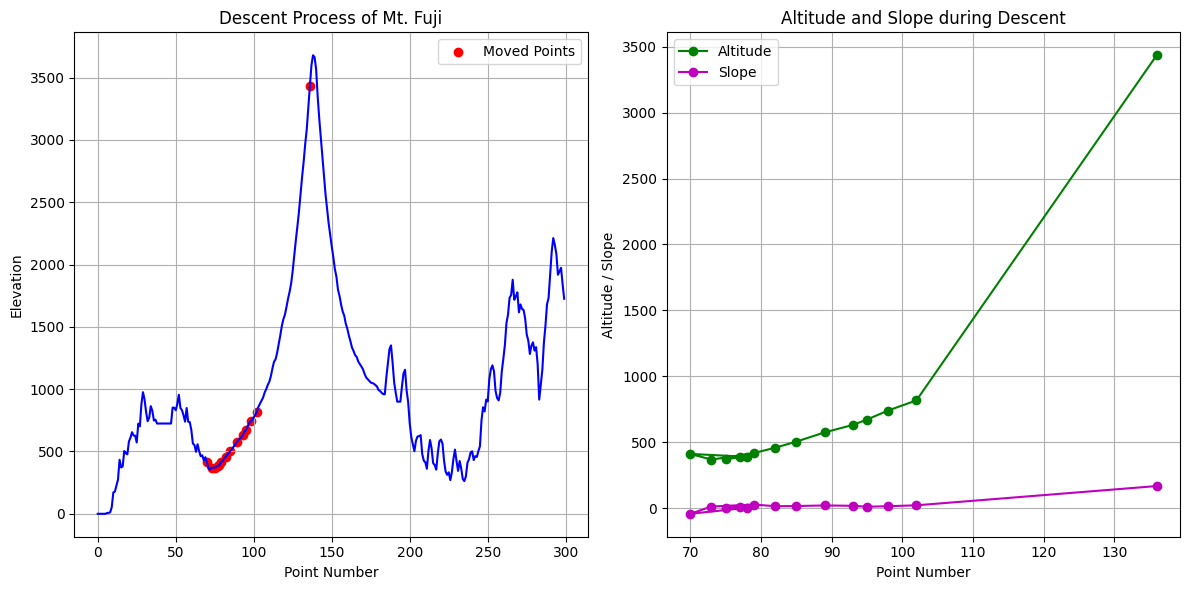

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_gradient(point_numbers, elevation):
    gradients = np.zeros_like(elevation)  # Initialize array for gradients

    for i in range(1, len(elevation)):
        dx = point_numbers[i] - point_numbers[i-1]
        dy = elevation[i] - elevation[i-1]
        gradient = dy / dx
        gradients[i] = gradient

    # Set the gradient for the first point to 0 (or any other desired value)
    gradients[0] = gradients[1]  # Setting the gradient for the first point as the same as the second

    return gradients

def calculate_next_point(current_point, current_gradient, alpha):
    # Calculate the destination point
    destination_point = current_point - alpha * current_gradient

    # Round to the nearest integer
    destination_point = int(round(destination_point))

    return destination_point

def descend_fuji(start_point, alpha, point_numbers, elevation, gradients):
    # Initialize lists to record the points and profiles
    path = [start_point]
    altitudes = [elevation[start_point]]
    slopes = [gradients[start_point]]

    current_point = start_point

    while True:
        current_gradient = gradients[current_point]
        next_point = calculate_next_point(current_point, current_gradient, alpha)

        if next_point == current_point:
            break  # Stop if no further descent is possible

        path.append(next_point)
        altitudes.append(elevation[next_point])
        slopes.append(gradients[next_point])

        current_point = next_point

    return path, altitudes, slopes

# Example usage
alpha = 0.2  # Learning rate

# Example data (replace with your actual data loading and preparation)
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
point_numbers = fuji[:, 0]
elevation = fuji[:, 3]

# Calculate gradients
gradients = calculate_gradient(point_numbers, elevation)

# Starting point near the summit of Mt. Fuji (elevation 3434.59 [m])
start_point = 136

# Descend Mt. Fuji
path, altitudes, slopes = descend_fuji(start_point, alpha, point_numbers, elevation, gradients)

# Plotting the descent process
plt.figure(figsize=(12, 6))

# Plot 1: Points moved in the cross-section
plt.subplot(1, 2, 1)
plt.plot(point_numbers, elevation, linestyle='-', color='b')
plt.scatter(path, [elevation[i] for i in path], color='r', label='Moved Points')
plt.title('Descent Process of Mt. Fuji')
plt.xlabel('Point Number')
plt.ylabel('Elevation')
plt.grid(True)
plt.legend()

# Plot 2: Altitude and Slope
plt.subplot(1, 2, 2)
plt.plot(path, altitudes, marker='o', linestyle='-', color='g', label='Altitude')
plt.plot(path, slopes, marker='o', linestyle='-', color='m', label='Slope')
plt.title('Altitude and Slope during Descent')
plt.xlabel('Point Number')
plt.ylabel('Altitude / Slope')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**[Problem 6] Change of initial value**
In Question 4, we fixed the first "where we are" to 136, but calculate this at all other points. Specifically, it means being able to change the "current location".

For location 130

In [16]:
def calculate_gradient(point_numbers, elevation):
    gradients = np.zeros_like(elevation)  # Initialize array for gradients

    for i in range(1, len(elevation)):
        dx = point_numbers[i] - point_numbers[i-1]
        dy = elevation[i] - elevation[i-1]
        gradient = dy / dx
        gradients[i] = gradient

    # Set the gradient for the first point to 0 (or any other desired value)
    gradients[0] = gradients[1]  # Setting the gradient for the first point as the same as the second

    return gradients

def calculate_next_point(current_point, current_gradient, alpha):
    # Calculate the destination point
    destination_point = current_point - alpha * current_gradient

    # Round to the nearest integer
    destination_point = int(round(destination_point))

    return destination_point

def descend_fuji(start_point, alpha, point_numbers, elevation, gradients):
    # Initialize a list to record the points for each move
    path = [start_point]

    current_point = start_point

    while True:
        current_gradient = gradients[current_point]
        next_point = calculate_next_point(current_point, current_gradient, alpha)

        if next_point == current_point:
            break  # Stop if no further descent is possible

        path.append(next_point)
        current_point = next_point

    return path

# Example usage, alpha (learning rate) is set to 0.2, which determines how large steps are taken based on the gradient
alpha = 0.2  # Learning rate

# Example data (replace with your actual data loading and preparation)
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
point_numbers = fuji[:, 0]
elevation = fuji[:, 3]

# Calculate gradients
gradients = calculate_gradient(point_numbers, elevation)

# Starting point near the summit of Mt. Fuji (elevation 3434.59 [m])
start_point = 130

# Descend Mt. Fuji
path = descend_fuji(start_point, alpha, point_numbers, elevation, gradients)
print("Path of descent:", path)

Path of descent: [130, 103, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


**[Problem 7] Visualization of the descent process for each initial value**

In Problem 6, we calculated the descending process of all initial values. Therefore, please visualize what kind of descent process will be for some initial values as in Problem 5. It can be confirmed that the initial value affects the result in the gradient descent method.

<< What is the initial value? >>

The value like the first point in this example is called the initial value. Changing this will change the result. For example, 136 and 142 will go down different slopes of Mt. Fuji.

Path of descent: [130, 103, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


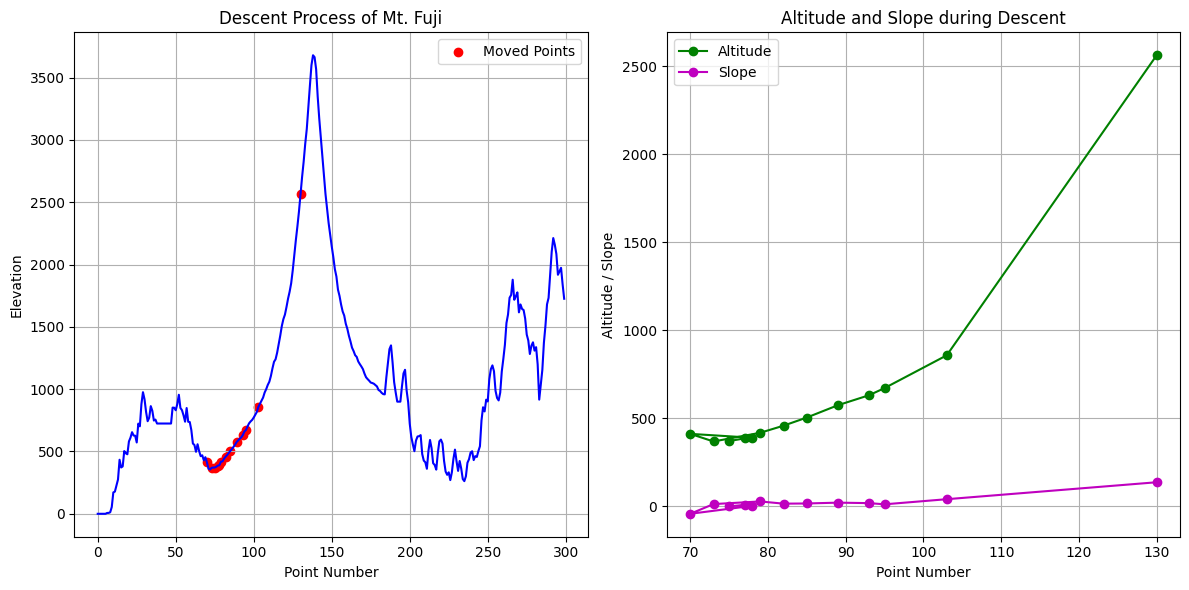

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_gradient(point_numbers, elevation):
    gradients = np.zeros_like(elevation)  # Initialize array for gradients

    for i in range(1, len(elevation)):
        dx = point_numbers[i] - point_numbers[i-1]
        dy = elevation[i] - elevation[i-1]
        gradient = dy / dx
        gradients[i] = gradient

    # Set the gradient for the first point to 0 (or any other desired value)
    gradients[0] = gradients[1]  # Setting the gradient for the first point as the same as the second

    return gradients

def calculate_next_point(current_point, current_gradient, alpha):
    # Calculate the destination point
    destination_point = current_point - alpha * current_gradient

    # Round to the nearest integer
    destination_point = int(round(destination_point))

    return destination_point

def descend_fuji(start_point, alpha, point_numbers, elevation, gradients):
    # Initialize a list to record the points for each move
    path = [start_point]

    current_point = start_point

    while True:
        current_gradient = gradients[current_point]
        next_point = calculate_next_point(current_point, current_gradient, alpha)

        if next_point == current_point:
            break  # Stop if no further descent is possible

        path.append(next_point)
        current_point = next_point

    return path

def visualize_descent(path, point_numbers, elevation):
    # Plotting the descent process
    plt.figure(figsize=(12, 6))

    # Plot 1: Points moved in the cross-section
    plt.subplot(1, 2, 1)
    plt.plot(point_numbers, elevation, linestyle='-', color='b')
    plt.scatter(path, [elevation[i] for i in path], color='r', label='Moved Points')
    plt.title('Descent Process of Mt. Fuji')
    plt.xlabel('Point Number')
    plt.ylabel('Elevation')
    plt.grid(True)
    plt.legend()

    # Plot 2: Altitude and Slope
    altitudes = [elevation[i] for i in path]
    slopes = [gradients[i] for i in path]
    plt.subplot(1, 2, 2)
    plt.plot(path, altitudes, marker='o', linestyle='-', color='g', label='Altitude')
    plt.plot(path, slopes, marker='o', linestyle='-', color='m', label='Slope')
    plt.title('Altitude and Slope during Descent')
    plt.xlabel('Point Number')
    plt.ylabel('Altitude / Slope')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage, alpha (learning rate) is set to 0.2, which determines how large steps are taken based on the gradient
alpha = 0.2  # Learning rate

# Example data (replace with your actual data loading and preparation)
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
point_numbers = fuji[:, 0]
elevation = fuji[:, 3]

# Calculate gradients
gradients = calculate_gradient(point_numbers, elevation)

# Starting point near the summit of Mt. Fuji (elevation 3434.59 [m])
start_point = 130

# Descend Mt. Fuji
path = descend_fuji(start_point, alpha, point_numbers, elevation, gradients)
print("Path of descent:", path)

# Visualize the descent process
visualize_descent(path, point_numbers, elevation)


Path of descent: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]
Path of descent: [130, 103, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]
Using different slopes until 95 point


**[Problem 8] (Advance problem) Hyperparameter changes**

Visualize what kind of descent process will occur if you change the hyperparameter $ \ alpha $, as in problem 5. And make sure that the hyperparameters make a big difference in the results

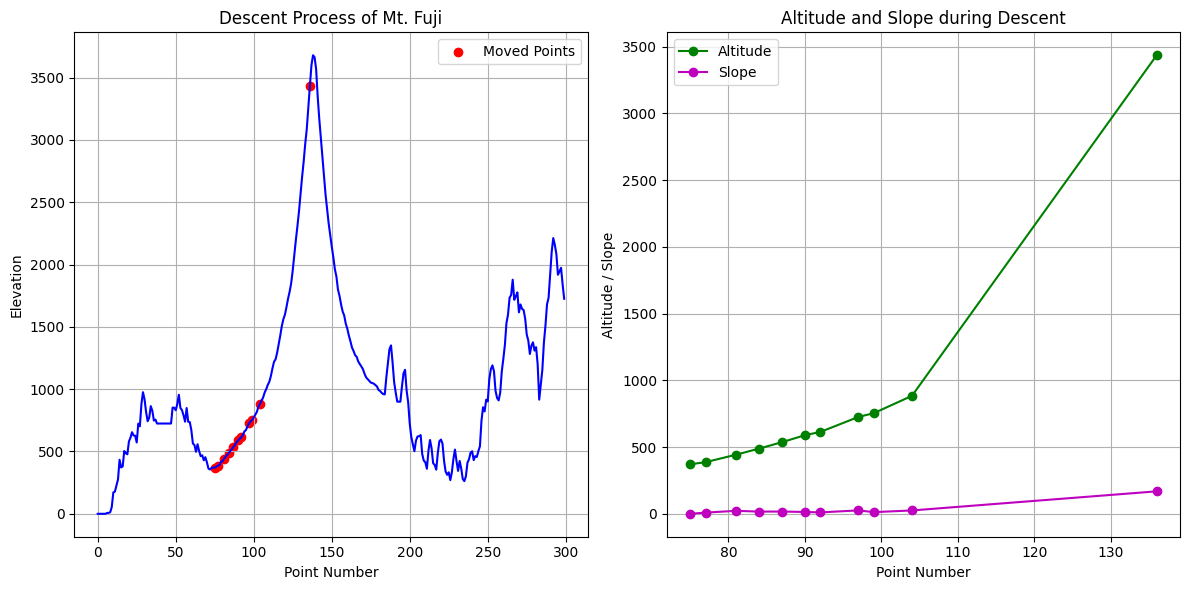

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_gradient(point_numbers, elevation):
    gradients = np.zeros_like(elevation)  # Initialize array for gradients

    for i in range(1, len(elevation)):
        dx = point_numbers[i] - point_numbers[i-1]
        dy = elevation[i] - elevation[i-1]
        gradient = dy / dx
        gradients[i] = gradient

    # Set the gradient for the first point to 0 (or any other desired value)
    gradients[0] = gradients[1]  # Setting the gradient for the first point as the same as the second

    return gradients

def calculate_next_point(current_point, current_gradient, alpha):
    # Calculate the destination point
    destination_point = current_point - alpha * current_gradient

    # Round to the nearest integer
    destination_point = int(round(destination_point))

    return destination_point

def descend_fuji(start_point, alpha, point_numbers, elevation, gradients):
    # Initialize lists to record the points and profiles
    path = [start_point]
    altitudes = [elevation[start_point]]
    slopes = [gradients[start_point]]

    current_point = start_point

    while True:
        current_gradient = gradients[current_point]
        next_point = calculate_next_point(current_point, current_gradient, alpha)

        if next_point == current_point:
            break  # Stop if no further descent is possible

        path.append(next_point)
        altitudes.append(elevation[next_point])
        slopes.append(gradients[next_point])

        current_point = next_point

    return path, altitudes, slopes

# Example usage
alpha = 0.19  # Learning rate

# Example data (replace with your actual data loading and preparation)
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
point_numbers = fuji[:, 0]
elevation = fuji[:, 3]

# Calculate gradients
gradients = calculate_gradient(point_numbers, elevation)

# Starting point near the summit of Mt. Fuji (elevation 3434.59 [m])
start_point = 136

# Descend Mt. Fuji
path, altitudes, slopes = descend_fuji(start_point, alpha, point_numbers, elevation, gradients)

# Plotting the descent process
plt.figure(figsize=(12, 6))

# Plot 1: Points moved in the cross-section
plt.subplot(1, 2, 1)
plt.plot(point_numbers, elevation, linestyle='-', color='b')
plt.scatter(path, [elevation[i] for i in path], color='r', label='Moved Points')
plt.title('Descent Process of Mt. Fuji')
plt.xlabel('Point Number')
plt.ylabel('Elevation')
plt.grid(True)
plt.legend()

# Plot 2: Altitude and Slope
plt.subplot(1, 2, 2)
plt.plot(path, altitudes, marker='o', linestyle='-', color='g', label='Altitude')
plt.plot(path, slopes, marker='o', linestyle='-', color='m', label='Slope')
plt.title('Altitude and Slope during Descent')
plt.xlabel('Point Number')
plt.ylabel('Altitude / Slope')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

the hyperparameter alpha is known as the learning rate. The learning rate determines the size of the steps taken during each iteration of the gradient descent process.
If alpha is too large, the steps taken in the direction of the gradient might be too big, causing the descent process to overshoot the minimum point. This can lead to instability and divergence.
If alpha is too small, the steps will be very tiny, resulting in a slow convergence to the minimum point. It might take a very long time to reach the minimum, or the process might get stuck in a local minimum.
Alpha 0.2, which means each step taken during the descent is 20% of the gradient's value

I applied 0.4 and 0.3, the program can not run
I applied 0.19,